In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('test_data.csv')
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [3]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [4]:
x = df.drop(columns=['prognosis'])  # All columns except target
y = df['prognosis']  # Target column

In [5]:
x.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y.head()

0       Fungal infection
1                Allergy
2                   GERD
3    Chronic cholestasis
4          Drug Reaction
Name: prognosis, dtype: object

In [57]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression #model 1
from sklearn.ensemble import RandomForestClassifier #model 2
from sklearn.svm import SVC #model 3
from sklearn.tree import DecisionTreeClassifier #model 4
from sklearn.metrics import precision_score, recall_score, f1_score
nb_samples = 1000
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2, random_state=42)


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

best_iter = 0
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0

for i in range(100, 2000, 100):  # Checking for iterations from 100 to 2000
    model1 = LogisticRegression(max_iter=i)
    model1.fit(xtrain, ytrain)
    ypred = model1.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    recall = recall_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_iter = i
        best_precision = precision
        best_recall = recall
        best_f1 = f1

print(f"Best max_iter: {best_iter}")
print(f"Best Accuracy: {best_accuracy:.2f}")
print(f"Best Precision: {best_precision:.2f}")
print(f"Best Recall: {best_recall:.2f}")
print(f"Best F1 Score: {best_f1:.2f}")


Best max_iter: 100
Best Accuracy: 0.98
Best Precision: 0.98
Best Recall: 0.98
Best F1 Score: 0.98


In [59]:
best_n = 0
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0

for n in range(10, 310, 10):  # Checking for estimators from 10 to 300
    model2 = RandomForestClassifier(n_estimators=n, random_state=42)
    model2.fit(xtrain, ytrain)
    ypred = model2.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    recall = recall_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = n
        best_precision = precision
        best_recall = recall
        best_f1 = f1

print(f"Best n_estimators: {best_n}")
print(f"Best Accuracy:{best_accuracy:.2f}")
print(f"Best Precision: {best_precision:.2f}")
print(f"Best Recall: {best_recall:.2f}")
print(f"Best F1 Score: {best_f1:.2f}")


Best n_estimators: 10
Best Accuracy:0.99
Best Precision: 1.00
Best Recall: 0.98
Best F1 Score: 0.99


In [60]:
best_C = 0
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0
    
for C in [0.01, 0.1, 1, 10, 100]:  # Testing different C values
    model3 = SVC(kernel='linear', probability=True, C=C)
    model3.fit(xtrain, ytrain)
    ypred = model3.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    recall = recall_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C
        best_precision = precision
        best_recall = recall
        best_f1 = f1
        
print(f"Best C: {best_C}")
print(f"Best Accuracy: {best_accuracy:.2f}")
print(f"Best Precision: {best_precision:.2f}")
print(f"Best Recall: {best_recall:.2f}")
print(f"Best F1 Score: {best_f1:.2f}")

Best C: 1
Best Accuracy: 0.98
Best Precision: 0.99
Best Recall: 0.98
Best F1 Score: 0.99


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

best_depth = None
best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0

for depth in range(1, 21):  # Checking max_depth from 1 to 20
    model4 = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model4.fit(xtrain, ytrain)
    ypred = model4.predict(xtest)
    
    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    recall = recall_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_precision = precision
        best_recall = recall
        best_f1 = f1
        best_depth = depth

print(f"Best max_depth: {best_depth}")
print(f"Best Accuracy: {best_accuracy:.2f}")
print(f"Best Precision: {best_precision:.2f}")
print(f"Best Recall: {best_recall:.2f}")
print(f"Best F1 Score: {best_f1:.2f}")


Best max_depth: 3
Best Accuracy: 0.98
Best Precision: 1.00
Best Recall: 0.96
Best F1 Score: 0.98


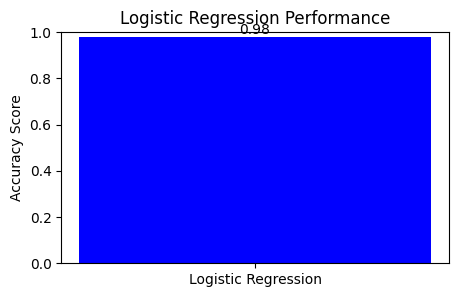

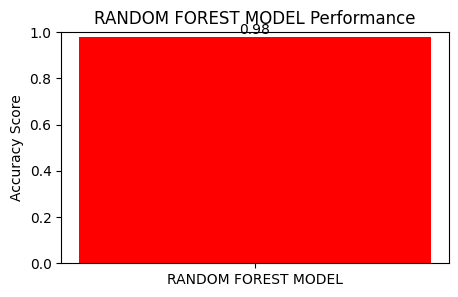

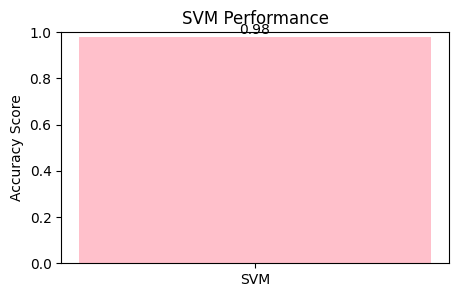

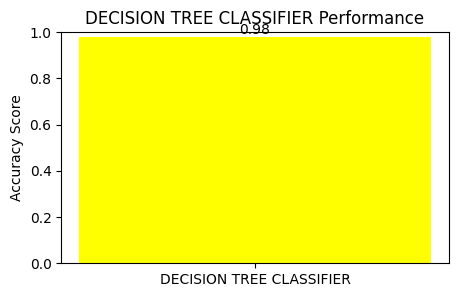

In [62]:
import matplotlib.pyplot as plt
# Plot bar chart 1
plt.figure(figsize=(5, 3))
plt.bar(["Logistic Regression"], [best_accuracy], color='blue')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression Performance")
# Show value on bar
plt.text("Logistic Regression", best_accuracy, f"{best_accuracy:.2f}", ha='center', va='bottom')
plt.show()

# Plot bar chart 2
plt.figure(figsize=(5, 3))
plt.bar(["RANDOM FOREST MODEL"], [best_accuracy], color='red')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel("Accuracy Score")
plt.title("RANDOM FOREST MODEL Performance")
# Show value on bar
plt.text("RANDOM FOREST MODEL", best_accuracy, f"{best_accuracy:.2f}", ha='center', va='bottom')
plt.show()

# Plot bar chart 3
plt.figure(figsize=(5, 3))
plt.bar(["SVM"], [best_accuracy], color='pink')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel("Accuracy Score")
plt.title("SVM Performance")
# Show value on bar
plt.text("SVM", best_accuracy, f"{best_accuracy:.2f}", ha='center', va='bottom')
plt.show()

# Plot bar chart 4
plt.figure(figsize=(5, 3))
plt.bar(["DECISION TREE CLASSIFIER"], [best_accuracy], color='yellow')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel("Accuracy Score")
plt.title("DECISION TREE CLASSIFIER Performance")
# Show value on bar
plt.text("DECISION TREE CLASSIFIER", best_accuracy, f"{best_accuracy:.2f}", ha='center', va='bottom')
plt.show()

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, x, y, cv=5, scoring='accuracy')
print("Logistic Regression",f"Cross-Validation Scores: {scores}")
print("Logistic Regression",f"Average Accuracy: {scores.mean()}")
scores = cross_val_score(model2, x, y, cv=5, scoring='accuracy')
print("RANDOM FOREST",f"Cross-Validation Scores: {scores}")
print("RANDOM FOREST",f"Average Accuracy: {scores.mean()}")
scores = cross_val_score(model3, x, y, cv=5, scoring='accuracy')
print("SVM",f"Cross-Validation Scores: {scores}")
print("SVM",f"Average Accuracy: {scores.mean()}")
scores = cross_val_score(model4, x, y, cv=5, scoring='accuracy')
print("DECISION TREE CLASSIFIER",f"Cross-Validation Scores: {scores}")
print("DECISION TREE CLASSIFIER",f"Average Accuracy: {scores.mean()}")


Logistic Regression Cross-Validation Scores: [0.98  0.975 0.975 0.99  0.97 ]
Logistic Regression Average Accuracy: 0.978
RANDOM FOREST Cross-Validation Scores: [0.98  0.985 0.98  0.995 0.98 ]
RANDOM FOREST Average Accuracy: 0.984
SVM Cross-Validation Scores: [0.975 0.975 0.98  0.99  0.975]
SVM Average Accuracy: 0.9789999999999999
DECISION TREE CLASSIFIER Cross-Validation Scores: [0.98  0.975 0.975 0.985 0.975]
DECISION TREE CLASSIFIER Average Accuracy: 0.978
